In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
df = pd.read_csv("heart_v2.csv")

df.head()

,Id,Age,Sex,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Target
0,0,63,Male,Asymptomatic,145,233,> 120 mg/dl,0,150,No,2.3,0,0,1,1
1,1,37,Male,Non-anginal Pain,130,250,<= 120 mg/dl,1,187,No,3.5,0,0,2,1
2,2,41,Female,Atypical Angina,130,204,<= 120 mg/dl,0,172,No,1.4,2,0,2,1
3,3,56,Male,Atypical Angina,120,236,<= 120 mg/dl,1,178,No,0.8,2,0,2,1
4,4,57,Female,Typical Angina,120,354,<= 120 mg/dl,1,163,Yes,0.6,2,0,2,1


In [158]:
df.isnull().sum()

Id                         0
Age                        0
Sex                        0
Chest_Pain                 0
Resting_Pressure           0
Cholesterol                0
Fasting_Blood_Sugar        0
Resting_Ecg_Results        0
Maximum_Heart_Rate         0
Exercise_Induced_Angina    0
Old_Peak                   0
Slope                      0
Major_Vessels              0
Thallium_Rate              0
Target                     0
dtype: int64

In [159]:
# sns.pairplot(df)

In [160]:
# convert Sex in df["Sex"] from male female to 0 and 1 use get_dummies


df = pd.get_dummies(df , columns=["Sex"], drop_first=True)
df = pd.get_dummies(df , columns=["Exercise_Induced_Angina"], drop_first=True)
df.head()




,Id,Age,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Target,Sex_Male,Exercise_Induced_Angina_Yes
0,0,63,Asymptomatic,145,233,> 120 mg/dl,0,150,2.3,0,0,1,1,1,0
1,1,37,Non-anginal Pain,130,250,<= 120 mg/dl,1,187,3.5,0,0,2,1,1,0
2,2,41,Atypical Angina,130,204,<= 120 mg/dl,0,172,1.4,2,0,2,1,0,0
3,3,56,Atypical Angina,120,236,<= 120 mg/dl,1,178,0.8,2,0,2,1,1,0
4,4,57,Typical Angina,120,354,<= 120 mg/dl,1,163,0.6,2,0,2,1,0,1


In [161]:
#convert chest_pain to conding from text to conding
df["Chest_Pain"].unique()

array(['Asymptomatic', 'Non-anginal Pain', 'Atypical Angina',
       'Typical Angina'], dtype=object)

In [162]:
df["Chest_Pain"] = df["Chest_Pain"].map({"Typical Angina": 1, "Atypical Angina": 2, "Non-anginal Pain": 3, "Asymptomatic": 4})
df.head()


,Id,Age,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Target,Sex_Male,Exercise_Induced_Angina_Yes
0,0,63,4,145,233,> 120 mg/dl,0,150,2.3,0,0,1,1,1,0
1,1,37,3,130,250,<= 120 mg/dl,1,187,3.5,0,0,2,1,1,0
2,2,41,2,130,204,<= 120 mg/dl,0,172,1.4,2,0,2,1,0,0
3,3,56,2,120,236,<= 120 mg/dl,1,178,0.8,2,0,2,1,1,0
4,4,57,1,120,354,<= 120 mg/dl,1,163,0.6,2,0,2,1,0,1


In [163]:
#convert fasting blood sugar to conding from text to conding

df["Fasting_Blood_Sugar"].unique()



array(['> 120 mg/dl', '<= 120 mg/dl'], dtype=object)

In [164]:
df["Fasting_Blood_Sugar"] = df["Fasting_Blood_Sugar"].map({"> 120 mg/dl": 1, "<= 120 mg/dl": 0})

df.head()

,Id,Age,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Target,Sex_Male,Exercise_Induced_Angina_Yes
0,0,63,4,145,233,1,0,150,2.3,0,0,1,1,1,0
1,1,37,3,130,250,0,1,187,3.5,0,0,2,1,1,0
2,2,41,2,130,204,0,0,172,1.4,2,0,2,1,0,0
3,3,56,2,120,236,0,1,178,0.8,2,0,2,1,1,0
4,4,57,1,120,354,0,1,163,0.6,2,0,2,1,0,1


In [165]:
X = df.drop(["Target", "Id"], axis=1)
y = df["Target"]

X

,Age,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Sex_Male,Exercise_Induced_Angina_Yes
0,63,4,145,233,1,0,150,2.3,0,0,1,1,0
1,37,3,130,250,0,1,187,3.5,0,0,2,1,0
2,41,2,130,204,0,0,172,1.4,2,0,2,0,0
3,56,2,120,236,0,1,178,0.8,2,0,2,1,0
4,57,1,120,354,0,1,163,0.6,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1,140,241,0,1,123,0.2,1,0,3,0,1
299,45,4,110,264,0,1,132,1.2,1,0,3,1,0
300,68,1,144,193,1,1,141,3.4,1,2,3,1,0
301,57,1,130,131,0,1,115,1.2,1,1,3,1,1


In [166]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: Target, Length: 303, dtype: int64

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [168]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

c:\Users\Legion\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [169]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [170]:
model.score(X_test, y_test)

0.8852459016393442

In [171]:
model.coef_

array([[ 0.00164458,  0.80924696, -0.01191897, -0.00158151,  0.02359933,
         0.53759774,  0.02336897, -0.65639494,  0.62607041, -0.7333702 ,
        -0.910845  , -1.23908549, -0.85412377]])

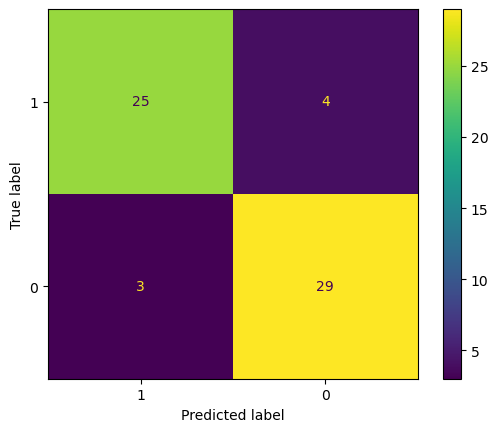

In [172]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

classes = df.Target.unique()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

In [173]:
from sklearn.linear_model import SGDClassifier
#use best parameters
model = SGDClassifier(loss="log", max_iter=1000, random_state=42, penalty="l1", alpha=0.01)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

c:\Users\Legion\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8524590163934426

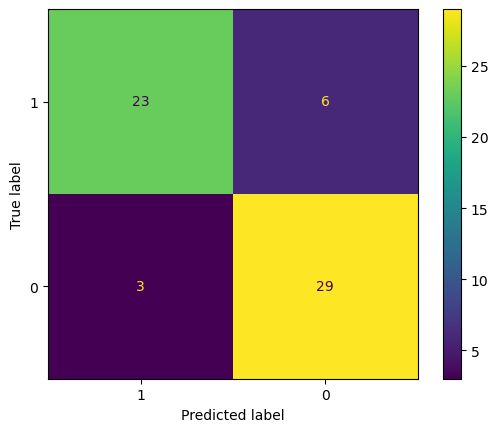

In [174]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

classes = df.Target.unique()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

In [191]:
from sklearn.linear_model import RidgeClassifier

#use best parameters to score 0.9

model = RidgeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.8688524590163934

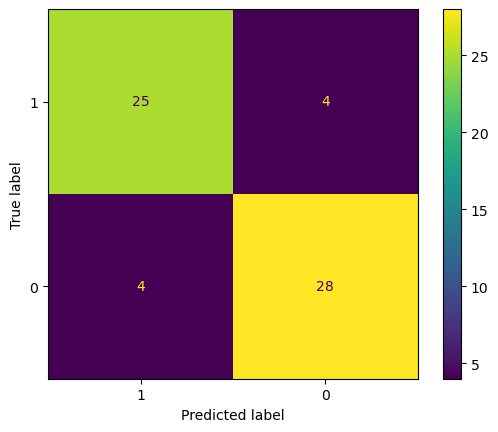

In [179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

classes = df.Target.unique()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()